#### HISTOGRAMA - EQUALIZAÇÃO

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Carregando a imagem em escala de cinza
imagem = cv2.imread('Imagens/00_edilson.png', cv2.IMREAD_GRAYSCALE)

# Passo 1: Calculando o Histograma
histograma = np.zeros(256, dtype=int)
altura, largura = imagem.shape
for i in range(altura):
    for j in range(largura):
        intensidade = int(imagem[i, j])
        histograma[intensidade] += 1

# Passo 2: Calculando a CDF (Função de Distribuição de Acumulada)
cdf = np.zeros(256, dtype=int)
cdf[0] = histograma[0]
for i in range(1, 256):
    cdf[i] = cdf[i - 1] + histograma[i]

# Passo 3: Normalizando a CDF
cdf_min = np.min(cdf)
cdf_max = np.max(cdf)
cdf_normalizada = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)

# Passo 4: Mapeando as Intensidades
imagem_equalizada = np.zeros_like(imagem)
for i in range(altura):
    for j in range(largura):
        intensidade = int(imagem[i, j])
        imagem_equalizada[i, j] = cdf_normalizada[intensidade]


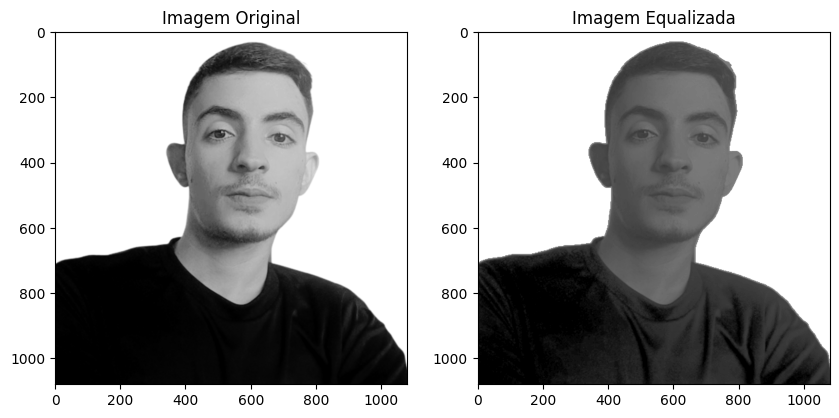

In [6]:
# Plotando as imagens original e equalizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(imagem_equalizada, cmap='gray')
plt.title('Imagem Equalizada')
plt.show()